In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import tkinter as tk
import os
from tkinter import filedialog
import sys
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
education = pd.read_csv(file)

In [ ]:
# First Moment Business Decision: Mean Median, Mode

print('The mean Workexp is {0}, The Median workexp is {1}, The Mode of Workexp is {2}'.format(education.workex.mean(),education.workex.median(),education.workex.mode()))

In [ ]:
# Second Moment Business Decision: The measures of dispersion: Variance, Standard Deviance and Range

print('The Variance of the work Experience is {0}, Standard deviation is {1} and range is {2}'.format(education.workex.var(),education.workex.std(),(max(education.workex)-min(education.workex))))

In [ ]:
# Third Moment Business Decision : Skewness

print('The Skewness of Workexp is {0} and the skewness of GMAT is {1}'.format(education.workex.skew(),education.gmat.skew()))

# -ve skewness value indicates it is a left tailed or left skewed
# +ve skewness indicate it is a right tailed distribution or right skewed.

In [ ]:
# Fourth Moment of Business: Kurtosis

print('The Skewness of Workexp is {0} and the skewness of GMAT is {1}'.format(education.workex.kurt(),education.gmat.kurt()))

# Positive value in Kurtosis indicate a narrow peak
# Negative valued kurtosis indicate a wider peak.

<h3>Data Visualization </h3>

In [ ]:
education.shape # Gives the shape of the data. i.e.,  number of rows and columns

In [ ]:
plt.bar(height=education.gmat,x=np.arange(1,774,1)); 
# By ending the Plot quote with ';' We can elminate the test generated above the plot.
# Generating a bar chart with each value in the row as a bar, representing GMAT scores on Y-axis and arranged numbers from 1 to 774 in increment of 1 on X-axis

In [ ]:
plt.hist(education.gmat);

# Histogram of GMAT scores

In [ ]:
plt.boxplot(education.gmat);

# Boxplot for the GMAT Scores

In [ ]:
# Generating a Quantile Quantile plot to check if the data is normally distributed or not

import pylab
stats.probplot(education.gmat,dist='norm',plot=pylab) # from scipy stats library was imported already

In [ ]:
stats.probplot(education.workex,dist='norm',plot=pylab)

In [ ]:
# The data looks like exponential distribution. So, applying Log transformation
stats.probplot(np.log(education.workex),dist='norm',plot=pylab)

<h2><b>Data Preprocessing

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic diversity Dataset from EDA_Dataset folder
df = pd.read_csv(file)

<b> Typecasting data

In [ ]:
#Converting the Salaries into int64 format
print(df.dtypes)
df.Salaries=df.Salaries.astype('int64')
print('The updated data  type of Salies is {}'.format(df.Salaries.dtype))
a= df.age.dtypes
df.age=df.age.astype('float32')
print('The initial data type for age is {0}. The updated data type of age now is {1}'.format(a,df.age.dtypes))

<b>Identifying and removing duplicates in the data

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic mtcars_dup from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
duplicate =df.duplicated() # Creates a Series filled with True or False if the row is a duplicate or not
sum(duplicate) # Returns the total number of duplicates
sum(df.cyl.duplicated())# Returns the number of duplicated values in the column cyl
## Removing the duplcates ##
df =df.drop_duplicates() # Drops the Duplicated rows
sum(df.duplicated())# Checking for duplicates after dropping the duplicates

<b>Outlier Treatment

In [ ]:
root=tk.Tk()
root.withdraw()
file=filedialog.askopenfile(title="Select the file")
# Import ethnic diversity dataset from EDA_Dataset folder
df = pd.read_csv(file)

In [ ]:
# Findout the outliers in Salaries Column.
sns.boxplot(x=df.Salaries);

(310, 13)
(306, 13)


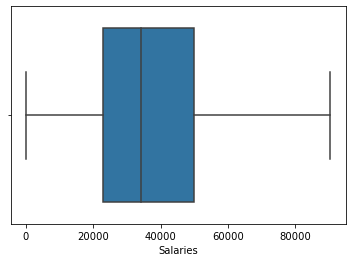

In [25]:
## Alpha Trimming ##
# A column can be either referred as dataframe[column] or dataframe.column
IQR=df['Salaries'].quantile(0.75)-df.Salaries.quantile(0.25) # Calculating the Inter Quantile range Q3-Q1
lower_limit=df['Salaries'].quantile(0.25)-(IQR*1.5)
upper_limit=df['Salaries'].quantile(0.75)+(IQR*1.5)

# Alpha-Trimming
outliers=np.where(df.Salaries>upper_limit,True,np.where(df.Salaries<lower_limit,True,False))
df_trimmed=df.loc[~(outliers),]
print(df.shape)
print(df_trimmed.shape)
sns.boxplot(x=df_trimmed.Salaries);

(310, 15)


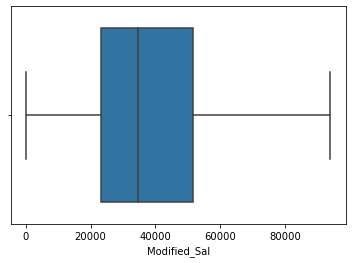

In [39]:
## Winsorization ##
# Replacing the outlier values with the border value i.e., Q3+IQR*1.5 and Q1-IQR*1.5
df['Modified_Sal']= pd.DataFrame(np.where(df.Salaries>upper_limit,upper_limit,np.where(df.Salaries<lower_limit,lower_limit,df.Salaries)))
print(df.shape)
sns.boxplot(x=df.Modified_Sal);

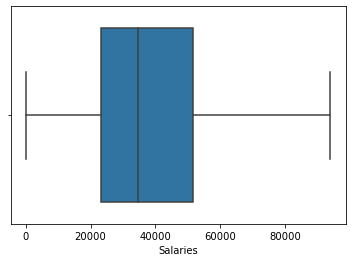

In [45]:
# Alternatively we can use winsorizer function from feature_engine
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Salaries'])
df_t=winsor.fit_transform(df[['Salaries']])
sns.boxplot(x=df_t.Salaries);